In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import uproot # uproot examples: https://indico.cern.ch/event/686641/contributions/2894906/attachments/1606247/2548596/pivarski-uproot.pdf

In [3]:
def GetCut(tree):
    cut = np.where((tree['passed_xy_thresh'].array() == True) \
               & (tree['passed_z_thresh'].array() == True) \
               & (tree['n_x_ch_abovenoise'].array() > 0) \
               & (tree['n_y_ch_abovenoise'].array() > 0) \
               & (tree['m_nOPCal'].array() < (1.077*tree['m_nQ'].array()+313)) \
               & (tree['m_nOPCal'].array() > (0.597*tree['m_nQ'].array()-216)) \
               & (tree['standoff'].array() > 0) \
               & (tree['m_DNNvalue'].array() > 0.85) \
               & (tree['energy'].array() > 700) \
               & (tree['energy'].array() < 3500) \
              )
    return cut         

In [4]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [5]:
File = "/p/vast1/nexo/data/merged-v4/Baseline2019_%s_%s.root"

In [6]:
bb0n = uproot.open("/p/vast1/nexo/data/merged-v4/Baseline2019_bb0n_FullLXe.root")['tree']

In [7]:
bb0n_cut = GetCut(bb0n)

In [8]:
h,hx = np.histogram(bb0n['energy'].array()[bb0n_cut], bins=np.linspace(2000,3000,10000))

In [9]:
Xmin = 2400.0
Xmax = 2520.0
cut = np.where((hx>Xmin) & (hx<Xmax))
popt, pcov = curve_fit(gaus, hx[cut], h[cut], p0=[1E7,2458,10])

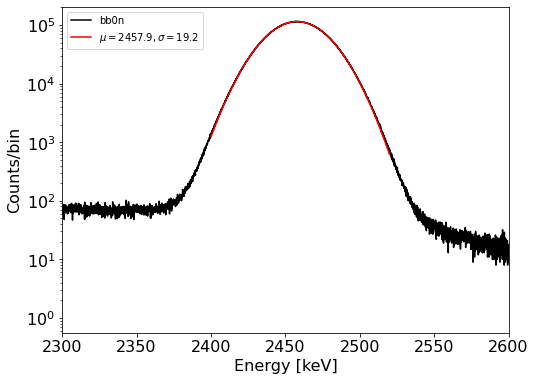

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Energy [keV]', fontsize=16)
plt.ylabel('Counts/bin', fontsize=16)

plt.step(hx[:-1],h, label='bb0n' , color='k', where='mid')
plt.plot(np.linspace(Xmin,Xmax,500), gaus(np.linspace(Xmin,Xmax,500), *popt), lw=1.5, label = r'$\mu = %.1f, \sigma = %.1f$' % (popt[1], popt[2]), color='red')

plt.xlim(2300,2600)
plt.yscale('log')
plt.legend(loc='upper left')
plt.savefig('energy_ROI_bb0n.pdf', bbox_inches='tight')

In [11]:
print("Amplitude: %.2f ± %.5f" % (popt[0], np.sqrt(np.diag(pcov))[0]))
print("Mean: %.2f ± %.5f" % (popt[1], np.sqrt(np.diag(pcov))[1]))
print("Sigma: %.2f ± %.5f" % (popt[2], np.sqrt(np.diag(pcov))[2]))
print("-"*10)
print("Energy ROI in FWHM: %.2f±%.2f = %.2f - %.2f" % (popt[1], popt[2]*2*np.sqrt(2*np.log(2)), popt[1]-popt[2]*2*np.sqrt(2*np.log(2)), popt[1]+popt[2]*2*np.sqrt(2*np.log(2))))
print("Energy ROI in Sigma: %.2f±%.2f = %.2f - %.2f" % (popt[1], popt[2], popt[1]-popt[2], popt[1]+popt[2]))

Amplitude: 114581.42 ± 16.47099
Mean: 2457.87 ± 0.00319
Sigma: 19.23 ± 0.00319
----------
Energy ROI in FWHM: 2457.87±45.28 = 2412.59 - 2503.14
Energy ROI in Sigma: 2457.87±19.23 = 2438.64 - 2477.09
